In [1]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

**Introduction** \|\| [Tensors](tensors_deeper_tutorial.html) \|\|
[Autograd](autogradyt_tutorial.html) \|\| [Building
Models](modelsyt_tutorial.html) \|\| [TensorBoard
Support](tensorboardyt_tutorial.html) \|\| [Training
Models](trainingyt.html) \|\| [Model Understanding](captumyt.html)

Introduction to PyTorch
=======================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=IC0_FRiX-sw).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/IC0_FRiX-sw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

PyTorch Tensors
---------------

Follow along with the video beginning at
[03:50](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=230s).

First, we'll import pytorch.


In [2]:
import torch

Let's see a few basic tensor manipulations. First, just a few of the
ways to create tensors:


In [3]:
z = torch.zeros(4, 4)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we create a 5x3 matrix filled with zeros, and query its datatype
to find out that the zeros are 32-bit floating point numbers, which is
the default PyTorch.

What if you wanted integers instead? You can always override the
default:


In [4]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


You can see that when we do change the default, the tensor helpfully
reports this when printed.

It's common to initialize learning weights randomly, often with a
specific seed for the PRNG for reproducibility of results:


In [5]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of
similar shapes may be added, multiplied, etc. Operations with scalars
are distributed over the tensor:


In [6]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Here's a small sample of the mathematical operations available:


In [7]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


There's a good deal more to know about the power of PyTorch tensors,
including how to set them up for parallel computations on GPU - we'll be
going into more depth in another video.

PyTorch Models
==============

Follow along with the video beginning at
[10:00](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=600s).

Let's talk about how we can express models in PyTorch


In [8]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

![](https://pytorch.org/tutorials/_static/img/mnist.png)

*Figure: LeNet-5*

Above is a diagram of LeNet-5, one of the earliest convolutional neural
nets, and one of the drivers of the explosion in Deep Learning. It was
built to read small images of handwritten numbers (the MNIST dataset),
and correctly classify which digit was represented in the image.

Here's the abridged version of how it works:

-   Layer C1 is a convolutional layer, meaning that it scans the input
    image for features it learned during training. It outputs a map of
    where it saw each of its learned features in the image. This
    "activation map" is downsampled in layer S2.
-   Layer C3 is another convolutional layer, this time scanning C1's
    activation map for *combinations* of features. It also puts out an
    activation map describing the spatial locations of these feature
    combinations, which is downsampled in layer S4.
-   Finally, the fully-connected layers at the end, F5, F6, and OUTPUT,
    are a *classifier* that takes the final activation map, and
    classifies it into one of ten bins representing the 10 digits.

How do we express this simple neural network in code?


In [9]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Looking over this code, you should be able to spot some structural
similarities with the diagram above.

This demonstrates the structure of a typical PyTorch model:

-   It inherits from `torch.nn.Module` - modules may be nested - in
    fact, even the `Conv2d` and `Linear` layer classes inherit from
    `torch.nn.Module`.
-   A model will have an `__init__()` function, where it instantiates
    its layers, and loads any data artifacts it might need (e.g., an NLP
    model might load a vocabulary).
-   A model will have a `forward()` function. This is where the actual
    computation happens: An input is passed through the network layers
    and various functions to generate an output.
-   Other than that, you can build out your model class like any other
    Python class, adding whatever properties and methods you need to
    support your model's computation.

Let's instantiate this object and run a sample input through it.


In [10]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


There are a few important things happening above:

First, we instantiate the `LeNet` class, and we print the `net` object.
A subclass of `torch.nn.Module` will report the layers it has created
and their shapes and parameters. This can provide a handy overview of a
model if you want to get the gist of its processing.

Below that, we create a dummy input representing a 32x32 image with 1
color channel. Normally, you would load an image tile and convert it to
a tensor of this shape.

You may have noticed an extra dimension to our tensor - the *batch
dimension.* PyTorch models assume they are working on *batches* of data
- for example, a batch of 16 of our image tiles would have the shape
`(16, 1, 32, 32)`. Since we're only using one image, we create a batch
of 1 with shape `(1, 1, 32, 32)`.

We ask the model for an inference by calling it like a function:
`net(input)`. The output of this call represents the model's confidence
that the input represents a particular digit. (Since this instance of
the model hasn't learned anything yet, we shouldn't expect to see any
signal in the output.) Looking at the shape of `output`, we can see that
it also has a batch dimension, the size of which should always match the
input batch dimension. If we had passed in an input batch of 16
instances, `output` would have a shape of `(16, 10)`.

Datasets and Dataloaders
========================

Follow along with the video beginning at
[14:00](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=840s).

Below, we're going to demonstrate using one of the ready-to-download,
open-access datasets from TorchVision, how to transform the images for
consumption by your model, and how to use the DataLoader to feed batches
of data to your model.

The first thing we need to do is transform our incoming images into a
PyTorch tensor.


In [11]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

Here, we specify two transformations for our input:

-   `transforms.ToTensor()` converts images loaded by Pillow into
    PyTorch tensors.
-   `transforms.Normalize()` adjusts the values of the tensor so that
    their average is zero and their standard deviation is 1.0. Most
    activation functions have their strongest gradients around x = 0, so
    centering our data there can speed learning. The values passed to
    the transform are the means (first tuple) and the standard
    deviations (second tuple) of the rgb values of the images in the
    dataset. You can calculate these values yourself by running these
    few lines of code:
    `` `        from torch.utils.data import ConcatDataset        transform = transforms.Compose([transforms.ToTensor()])        trainset = torchvision.datasets.CIFAR10(root='./data', train=True,                                     download=True, transform=transform)         #stack all train images together into a tensor of shape         #(50000, 3, 32, 32)        x = torch.stack([sample[0] for sample in ConcatDataset([trainset])])         #get the mean of each channel                    mean = torch.mean(x, dim=(0,2,3)) #tensor([0.4914, 0.4822, 0.4465])        std = torch.std(x, dim=(0,2,3)) #tensor([0.2470, 0.2435, 0.2616]) ``\`

There are many more transforms available, including cropping, centering,
rotation, and reflection.

Next, we'll create an instance of the CIFAR10 dataset. This is a set of
32x32 color image tiles representing 10 classes of objects: 6 of animals
(bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane,
automobile, ship, truck):


In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170M/170M [00:05<00:00, 31.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>When you run the cell above, it may take a little time for thedataset to download.</p>

</div>

This is an example of creating a dataset object in PyTorch. Downloadable
datasets (like CIFAR-10 above) are subclasses of
`torch.utils.data.Dataset`. `Dataset` classes in PyTorch include the
downloadable datasets in TorchVision, Torchtext, and TorchAudio, as well
as utility dataset classes such as `torchvision.datasets.ImageFolder`,
which will read a folder of labeled images. You can also create your own
subclasses of `Dataset`.

When we instantiate our dataset, we need to tell it a few things:

-   The filesystem path to where we want the data to go.
-   Whether or not we are using this set for training; most datasets
    will be split into training and test subsets.
-   Whether we would like to download the dataset if we haven't already.
-   The transformations we want to apply to the data.

Once your dataset is ready, you can give it to the `DataLoader`:


In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

A `Dataset` subclass wraps access to the data, and is specialized to the
type of data it's serving. The `DataLoader` knows *nothing* about the
data, but organizes the input tensors served by the `Dataset` into
batches with the parameters you specify.

In the example above, we've asked a `DataLoader` to give us batches of 4
images from `trainset`, randomizing their order (`shuffle=True`), and we
told it to spin up two workers to load data from disk.

It's good practice to visualize the batches your `DataLoader` serves:


 ship   car horse  ship


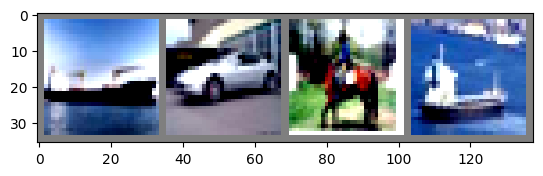

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Running the above cell should show you a strip of four images, and the
correct label for each.

Training Your PyTorch Model
===========================

Follow along with the video beginning at
[17:10](https://www.youtube.com/watch?v=IC0_FRiX-sw&t=1030s).

Let's put all the pieces together, and train a model:


In [15]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

First, we'll need training and test datasets. If you haven't already,
run the cell below to make sure the dataset is downloaded. (It may take
a minute.)


In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


We'll run our check on the output from `DataLoader`:


  cat   cat  deer  frog


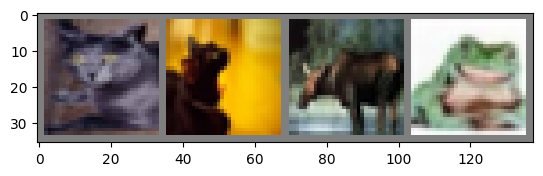

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

This is the model we'll train. If it looks familiar, that's because it's
a variant of LeNet - discussed earlier in this video - adapted for
3-color images.


In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

The last ingredients we need are a loss function and an optimizer:


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

The loss function, as discussed earlier in this video, is a measure of
how far from our ideal output the model's prediction was. Cross-entropy
loss is a typical loss function for classification models like ours.

The **optimizer** is what drives the learning. Here we have created an
optimizer that implements *stochastic gradient descent,* one of the more
straightforward optimization algorithms. Besides parameters of the
algorithm, like the learning rate (`lr`) and momentum, we also pass in
`net.parameters()`, which is a collection of all the learning weights in
the model - which is what the optimizer adjusts.

Finally, all of this is assembled into the training loop. Go ahead and
run this cell, as it will likely take a few minutes to execute:


In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.876
[1,  6000] loss: 1.654
[1,  8000] loss: 1.576
[1, 10000] loss: 1.517
[1, 12000] loss: 1.463
[2,  2000] loss: 1.416
[2,  4000] loss: 1.376
[2,  6000] loss: 1.338
[2,  8000] loss: 1.331
[2, 10000] loss: 1.317
[2, 12000] loss: 1.273
Finished Training


Here, we are doing only **2 training epochs** (line 1) - that is, two
passes over the training dataset. Each pass has an inner loop that
**iterates over the training data** (line 4), serving batches of
transformed input images and their correct labels.

**Zeroing the gradients** (line 9) is an important step. Gradients are
accumulated over a batch; if we do not reset them for every batch, they
will keep accumulating, which will provide incorrect gradient values,
making learning impossible.

In line 12, we **ask the model for its predictions** on this batch. In
the following line (13), we compute the loss - the difference between
`outputs` (the model prediction) and `labels` (the correct output).

In line 14, we do the `backward()` pass, and calculate the gradients
that will direct the learning.

In line 15, the optimizer performs one learning step - it uses the
gradients from the `backward()` call to nudge the learning weights in
the direction it thinks will reduce the loss.

The remainder of the loop does some light reporting on the epoch number,
how many training instances have been completed, and what the collected
loss is over the training loop.

**When you run the cell above,** you should see something like this:

``` {.sh}
[1,  2000] loss: 2.235
[1,  4000] loss: 1.940
[1,  6000] loss: 1.713
[1,  8000] loss: 1.573
[1, 10000] loss: 1.507
[1, 12000] loss: 1.442
[2,  2000] loss: 1.378
[2,  4000] loss: 1.364
[2,  6000] loss: 1.349
[2,  8000] loss: 1.319
[2, 10000] loss: 1.284
[2, 12000] loss: 1.267
Finished Training
```

Note that the loss is monotonically descending, indicating that our
model is continuing to improve its performance on the training dataset.

As a final step, we should check that the model is actually doing
*general* learning, and not simply "memorizing" the dataset. This is
called **overfitting,** and usually indicates that the dataset is too
small (not enough examples for general learning), or that the model has
more learning parameters than it needs to correctly model the dataset.

This is the reason datasets are split into training and test subsets -to
test the generality of the model, we ask it to make predictions on data
it hasn't trained on:


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


If you followed along, you should see that the model is roughly 50%
accurate at this point. That's not exactly state-of-the-art, but it's
far better than the 10% accuracy we'd expect from a random output. This
demonstrates that some general learning did happen in the model.


In [22]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Introduction](introyt1_tutorial.html) \|\| **Tensors** \|\|
[Autograd](autogradyt_tutorial.html) \|\| [Building
Models](modelsyt_tutorial.html) \|\| [TensorBoard
Support](tensorboardyt_tutorial.html) \|\| [Training
Models](trainingyt.html) \|\| [Model Understanding](captumyt.html)

Introduction to PyTorch Tensors
===============================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=r7QDUPb2dCM).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/r7QDUPb2dCM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

Tensors are the central data abstraction in PyTorch. This interactive
notebook provides an in-depth introduction to the `torch.Tensor` class.

First things first, let's import the PyTorch module. We'll also add
Python's math module to facilitate some of the examples.


In [23]:
import torch
import math

Creating Tensors
================

The simplest way to create a tensor is with the `torch.empty()` call:


In [24]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[1.6211e-32, 0.0000e+00, 9.2825e-33, 0.0000e+00],
        [3.1840e-36, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.2859e-32, 0.0000e+00, 1.6664e+13, 4.5572e-41]])


Let's upack what we just did:

-   We created a tensor using one of the numerous factory methods
    attached to the `torch` module.
-   The tensor itself is 2-dimensional, having 3 rows and 4 columns.
-   The type of the object returned is `torch.Tensor`, which is an alias
    for `torch.FloatTensor`; by default, PyTorch tensors are populated
    with 32-bit floating point numbers. (More on data types below.)
-   You will probably see some random-looking values when printing your
    tensor. The `torch.empty()` call allocates memory for the tensor,
    but does not initialize it with any values - so what you're seeing
    is whatever was in memory at the time of allocation.

A brief note about tensors and their number of dimensions, and
terminology:

-   You will sometimes see a 1-dimensional tensor called a *vector.*
-   Likewise, a 2-dimensional tensor is often referred to as a *matrix.*
-   Anything with more than two dimensions is generally just called a
    tensor.

More often than not, you'll want to initialize your tensor with some
value. Common cases are all zeros, all ones, or random values, and the
`torch` module provides factory methods for all of these:


In [25]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


The fctory methods all do just what you'd expect - we have a tensor full
of zeros, another full of ones, and another with random values between 0
and 1.

Random Tensors and Seeding
==========================

Speaking of the random tensor, did you notice the call to
`torch.manual_seed()` immediately preceding it? Initializing tensors,
such as a model's learning weights, with random values is common but
there are times - especially in research settings - where you'll want
some assurance of the reproducibility of your results. Manually setting
your random number generator's seed is the way to do this. Let's look
more closely:


In [26]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


What you should see above is that `random1` and `random3` carry
identical values, as do `random2` and `random4`. Manually setting the
RNG's seed resets it, so that identical computations depending on random
number should, in most settings, provide identical results.

For more information, see the [PyTorch documentation on
reproducibility](https://pytorch.org/docs/stable/notes/randomness.html).

Tensor Shapes
=============

Often, when you're performing operations on two or more tensors, they
will need to be of the same *shape* - that is, having the same number of
dimensions and the same number of cells in each dimension. For that, we
have the `torch.*_like()` methods:


In [27]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[6.7696e-33, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 8.9683e-44, 0.0000e+00]],

        [[1.1210e-43, 0.0000e+00, 1.4441e-33],
         [0.0000e+00, 5.2360e-33, 0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[-4.3854e-17,  4.5572e-41,  1.8545e-33],
         [ 0.0000e+00,  4.4842e-44,  0.0000e+00]],

        [[ 1.5695e-43,  0.0000e+00,  1.8597e-33],
         [ 0.0000e+00,  1.4013e-45,  0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


The first new thing in the code cell above is the use of the `.shape`
property on a tensor. This property contains a list of the extent of
each dimension of a tensor - in our case, `x` is a three-dimensional
tensor with shape 2 x 2 x 3.

Below that, we call the `.empty_like()`, `.zeros_like()`,
`.ones_like()`, and `.rand_like()` methods. Using the `.shape` property,
we can verify that each of these methods returns a tensor of identical
dimensionality and extent.

The last way to create a tensor that will cover is to specify its data
directly from a PyTorch collection:


In [28]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 5, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


Using `torch.tensor()` is the most straightforward way to create a
tensor if you already have data in a Python tuple or list. As shown
above, nesting the collections will result in a multi-dimensional
tensor.

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p><code>torch.tensor()</code> creates a copy of the data.</p>

</div>

Tensor Data Types
=================

Setting the datatype of a tensor is possible a couple of ways:


In [29]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
tensor([[ 0,  1,  5],
        [11, 11, 11]], dtype=torch.int32)


The simplest way to set the underlying data type of a tensor is with an
optional argument at creation time. In the first line of the cell above,
we set `dtype=torch.int16` for the tensor `a`. When we print `a`, we can
see that it's full of `1` rather than `1.` - Python's subtle cue that
this is an integer type rather than floating point.

Another thing to notice about printing `a` is that, unlike when we left
`dtype` as the default (32-bit floating point), printing the tensor also
specifies its `dtype`.

You may have also spotted that we went from specifying the tensor's
shape as a series of integer arguments, to grouping those arguments in a
tuple. This is not strictly necessary - PyTorch will take a series of
initial, unlabeled integer arguments as a tensor shape - but when adding
the optional arguments, it can make your intent more readable.

The other way to set the datatype is with the `.to()` method. In the
cell above, we create a random floating point tensor `b` in the usual
way. Following that, we create `c` by converting `b` to a 32-bit integer
with the `.to()` method. Note that `c` contains all the same values as
`b`, but truncated to integers.

For more information, see the [data types
documentation](https://pytorch.org/docs/stable/tensor_attributes.html#torch.dtype).

Math & Logic with PyTorch Tensors
=================================

Now that you know some of the ways to create a tensor... what can you do
with them?

Let's look at basic arithmetic first, and how tensors interact with
simple scalars:


In [30]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


As you can see above, arithmetic operations between tensors and scalars,
such as addition, subtraction, multiplication, division, and
exponentiation are distributed over every element of the tensor. Because
the output of such an operation will be a tensor, you can chain them
together with the usual operator precedence rules, as in the line where
we create `threes`.

Similar operations between two tensors also behave like you'd
intuitively expect:


In [31]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


It's important to note here that all of the tensors in the previous code
cell were of identical shape. What happens when we try to perform a
binary operation on tensors if dissimilar shape?

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>The following cell throws a run-time error. This is intentional.<pre><code>a = torch.rand(2, 3)
b = torch.rand(3, 2)</p>
<p>print(a * b)</code></pre></p>

</div>



In the general case, you cannot operate on tensors of different shape
this way, even in a case like the cell above, where the tensors have an
identical number of elements.

In Brief: Tensor Broadcasting
=============================

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>If you are familiar with broadcasting semantics in NumPyndarrays, you’ll find the same rules apply here.</p>

</div>

The exception to the same-shapes rule is *tensor broadcasting.* Here's
an example:


In [32]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.6146, 0.5999, 0.5013, 0.9397],
        [0.8656, 0.5207, 0.6865, 0.3614]])
tensor([[1.2291, 1.1998, 1.0026, 1.8793],
        [1.7312, 1.0413, 1.3730, 0.7228]])


What's the trick here? How is it we got to multiply a 2x4 tensor by a
1x4 tensor?

Broadcasting is a way to perform an operation between tensors that have
similarities in their shapes. In the example above, the one-row,
four-column tensor is multiplied by *both rows* of the two-row,
four-column tensor.

This is an important operation in Deep Learning. The common example is
multiplying a tensor of learning weights by a *batch* of input tensors,
applying the operation to each instance in the batch separately, and
returning a tensor of identical shape - just like our (2, 4) \* (1, 4)
example above returned a tensor of shape (2, 4).

The rules for broadcasting are:

-   Each tensor must have at least one dimension - no empty tensors.
-   Comparing the dimension sizes of the two tensors, *going from last
    to first:*
    -   Each dimension must be equal, *or*
    -   One of the dimensions must be of size 1, *or*
    -   The dimension does not exist in one of the tensors

Tensors of identical shape, of course, are trivially "broadcastable", as
you saw earlier.

Here are some examples of situations that honor the above rules and
allow broadcasting:


In [33]:
a =     torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]],

        [[0.6493, 0.2633],
         [0.4762, 0.0548],
         [0.2024, 0.5731]]])
tensor([[[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]],

        [[0.7191, 0.7191],
         [0.4067, 0.4067],
         [0.7301, 0.7301]]])
tensor([[[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]],

        [[0.6276, 0.7357],
         [0.6276, 0.7357],
         [0.6276, 0.7357]]])


Look closely at the values of each tensor above:

-   The multiplication operation that created `b` was broadcast over
    every "layer" of `a`.
-   For `c`, the operation was broadcast over every layer and row of
    `a` - every 3-element column is identical.
-   For `d`, we switched it around - now every *row* is identical,
    across layers and columns.

For more information on broadcasting, see the [PyTorch
documentation](https://pytorch.org/docs/stable/notes/broadcasting.html)
on the topic.

Here are some examples of attempts at broadcasting that will fail:

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>The following cell throws a run-time error. This is intentional.<pre><code>a =     torch.ones(4, 3, 2)</p>
<p>b = a * torch.rand(4, 3)    # dimensions must match last-to-first</p>
<p>c = a * torch.rand(   2, 3) # both 3rd &amp; 2nd dims different</p>
<p>d = a * torch.rand((0, ))   # can&#x27;t broadcast with an empty tensor</code></pre></p>

</div>



More Math with Tensors
======================

PyTorch tensors have over three hundred operations that can be performed
on them.

Here is a small sample from some of the major categories of operations:


In [34]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.linalg.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.linalg.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.linalg.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.9238, 0.5724, 0.0791, 0.2629],
        [0.1986, 0.4439, 0.6434, 0.4776]])
tensor([[-0., -0., 1., -0.],
        [-0., 1., 1., -0.]])
tensor([[-1., -1.,  0., -1.],
        [-1.,  0.,  0., -1.]])
tensor([[-0.5000, -0.5000,  0.0791, -0.2629],
        [-0.1986,  0.4439,  0.5000, -0.4776]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.7375, 0.8328],
        [0.8444, 0.2941]])
tensor([[2.2125, 2.4985],
        [2.5332, 0.8822]])
torch.return_types.linalg_svd(
U=tensor([[-0.7889, -0.6145],
        [-0.6145,  0.7889]]),
S=tensor([4.1498, 1.0548]),
Vh=tensor([[-0.7957, -0.6056],
        [ 0.6056, -0.7957

This is a small sample of operations. For more details and the full
inventory of math functions, have a look at the
[documentation](https://pytorch.org/docs/stable/torch.html#math-operations).
For more details and the full inventory of linear algebra operations,
have a look at this
[documentation](https://pytorch.org/docs/stable/linalg.html).

Altering Tensors in Place
=========================

Most binary operations on tensors will return a third, new tensor. When
we say `c = a * b` (where `a` and `b` are tensors), the new tensor `c`
will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place
-for example, if you're doing an element-wise computation where you can
discard intermediate values. For this, most of the math functions have a
version with an appended underscore (`_`) that will alter a tensor in
place.

For example:


In [35]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


For arithmetic operations, there are functions that behave similarly:


In [36]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b
      .mul_(b))
print(b)

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After adding:
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[1.3788, 1.4567],
        [1.0649, 1.6677]])
tensor([[0.3788, 0.4567],
        [0.0649, 0.6677]])

After multiplying
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])
tensor([[0.1435, 0.2086],
        [0.0042, 0.4459]])


Note that these in-place arithmetic functions are methods on the
`torch.Tensor` object, not attached to the `torch` module like many
other functions (e.g., `torch.sin()`). As you can see from `a.add_(b)`,
*the calling tensor is the one that gets changed in place.*

There is another option for placing the result of a computation in an
existing, allocated tensor. Many of the methods and functions we've seen
so far - including creation methods! - have an `out` argument that lets
you specify a tensor to receive the output. If the `out` tensor is the
correct shape and `dtype`, this can happen without a new memory
allocation:


In [37]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c) == old_id  # make sure that our new c is the same object as the old one

torch.rand(2, 2, out=c) # works for creation too!
print(c)                # c has changed again
assert id(c) == old_id  # still the same object!

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3653, 0.8699],
        [0.2364, 0.3604]])
tensor([[0.0776, 0.4004],
        [0.9877, 0.0352]])


Copying Tensors
===============

As with any object in Python, assigning a tensor to a variable makes the
variable a *label* of the tensor, and does not copy it. For example:


In [38]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

tensor([[  1., 561.],
        [  1.,   1.]])


But what if you want a separate copy of the data to work on? The
`clone()` method is there for you:


In [39]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


**There is an important thing to be aware of when using
\`\`clone()\`\`.** If your source tensor has autograd, enabled then so
will the clone. **This will be covered more deeply in the video on
autograd,** but if you want the light version of the details, continue
on.

*In many cases, this will be what you want.* For example, if your model
has multiple computation paths in its `forward()` method, and *both* the
original tensor and its clone contribute to the model's output, then to
enable model learning you want autograd turned on for both tensors. If
your source tensor has autograd enabled (which it generally will if it's
a set of learning weights or derived from a computation involving the
weights), then you'll get the result you want.

On the other hand, if you're doing a computation where *neither* the
original tensor nor its clone need to track gradients, then as long as
the source tensor has autograd turned off, you're good to go.

*There is a third case,* though: Imagine you're performing a computation
in your model's `forward()` function, where gradients are turned on for
everything by default, but you want to pull out some values mid-stream
to generate some metrics. In this case, you *don't* want the cloned copy
of your source tensor to track gradients - performance is improved with
autograd's history tracking turned off. For this, you can use the
`.detach()` method on the source tensor:


In [40]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], grad_fn=<CloneBackward0>)
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]])
tensor([[0.0905, 0.4485],
        [0.8740, 0.2526]], requires_grad=True)


What's happening here?

-   We create `a` with `requires_grad=True` turned on. **We haven't
    covered this optional argument yet, but will during the unit on
    autograd.**
-   When we print `a`, it informs us that the property
    `requires_grad=True` - this means that autograd and computation
    history tracking are turned on.
-   We clone `a` and label it `b`. When we print `b`, we can see that
    it's tracking its computation history - it has inherited `a`'s
    autograd settings, and added to the computation history.
-   We clone `a` into `c`, but we call `detach()` first.
-   Printing `c`, we see no computation history, and no
    `requires_grad=True`.

The `detach()` method *detaches the tensor from its computation
history.* It says, "do whatever comes next as if autograd was off." It
does this *without* changing `a` - you can see that when we print `a`
again at the end, it retains its `requires_grad=True` property.

Moving to
[Accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
\-\-\-\-\-\-\-\-\-\-\-\--

One of the major advantages of PyTorch is its robust acceleration on an
[accelerator](https://pytorch.org/docs/stable/torch.html#accelerators)
such as CUDA, MPS, MTIA, or XPU. So far, everything we've done has been
on CPU. How do we move to the faster hardware?

First, we should check whether an accelerator is available, with the
`is_available()` method.

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>If you do not have an accelerator, the executable cells in this section will not execute anyaccelerator-related code.</p>

</div>



In [41]:
if torch.cuda.is_available():
    print('We have an accelerator!')
else:
    print('Sorry, CPU only.')

We have an accelerator!


Once we've determined that one or more accelerators is available, we
need to put our data someplace where the accelerator can see it. Your
CPU does computation on data in your computer's RAM. Your accelerator
has dedicated memory attached to it. Whenever you want to perform a
computation on a device, you must move *all* the data needed for that
computation to memory accessible by that device. (Colloquially, "moving
the data to memory accessible by the GPU" is shorted to, "moving the
data to the GPU".)

There are multiple ways to get your data onto your target device. You
may do it at creation time:


In [43]:
if torch.cuda.is_available():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    gpu_rand = torch.rand(2, 2, device=device)
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

tensor([[0.3344, 0.2640],
        [0.2119, 0.0582]], device='cuda:0')


By default, new tensors are created on the CPU, so we have to specify
when we want to create our tensor on the accelerator with the optional
`device` argument. You can see when we print the new tensor, PyTorch
informs us which device it's on (if it's not on CPU).

You can query the number of accelerators with
`torch.accelerator.device_count()`. If you have more than one
accelerator, you can specify them by index, take CUDA for example:
`device='cuda:0'`, `device='cuda:1'`, etc.

As a coding practice, specifying our devices everywhere with string
constants is pretty fragile. In an ideal world, your code would perform
robustly whether you're on CPU or accelerator hardware. You can do this
by creating a device handle that can be passed to your tensors instead
of a string:


In [44]:
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.0024, 0.6778],
        [0.2441, 0.6812]], device='cuda:0')


If you have an existing tensor living on one device, you can move it to
another with the `to()` method. The following line of code creates a
tensor on CPU, and moves it to whichever device handle you acquired in
the previous cell.


In [45]:
y = torch.rand(2, 2)
y = y.to(my_device)

It is important to know that in order to do computation involving two or
more tensors, *all of the tensors must be on the same device*. The
following code will throw a runtime error, regardless of whether you
have an accelerator device available, take CUDA for example:

``` {.python}
x = torch.rand(2, 2)
y = torch.rand(2, 2, device='cuda')
z = x + y  # exception will be thrown
```


Manipulating Tensor Shapes
==========================

Sometimes, you'll need to change the shape of your tensor. Below, we'll
look at a few common cases, and how to handle them.

Changing the Number of Dimensions
---------------------------------

One case where you might need to change the number of dimensions is
passing a single instance of input to your model. PyTorch models
generally expect *batches* of input.

For example, imagine having a model that works on 3 x 226 x 226 images
-a 226-pixel square with 3 color channels. When you load and transform
it, you'll get a tensor of shape `(3, 226, 226)`. Your model, though, is
expecting input of shape `(N, 3, 226, 226)`, where `N` is the number of
images in the batch. So how do you make a batch of one?


In [46]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The `unsqueeze()` method adds a dimension of extent 1. `unsqueeze(0)`
adds it as a new zeroth dimension - now you have a batch of one!

So if that's *un*squeezing? What do we mean by squeezing? We're taking
advantage of the fact that any dimension of extent 1 *does not* change
the number of elements in the tensor.


In [47]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.2347]]]]])


Continuing the example above, let's say the model's output is a
20-element vector for each input. You would then expect the output to
have shape `(N, 20)`, where `N` is the number of instances in the input
batch. That means that for our single-input batch, we'll get an output
of shape `(1, 20)`.

What if you want to do some *non-batched* computation with that output
-something that's just expecting a 20-element vector?


In [49]:
a = torch.rand(1, 5)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 5])
tensor([[0.1891, 0.3952, 0.9176, 0.8960, 0.4887]])
torch.Size([5])
tensor([0.1891, 0.3952, 0.9176, 0.8960, 0.4887])
torch.Size([2, 2])
torch.Size([2, 2])


You can see from the shapes that our 2-dimensional tensor is now
1-dimensional, and if you look closely at the output of the cell above
you'll see that printing `a` shows an "extra" set of square brackets
`[]` due to having an extra dimension.

You may only `squeeze()` dimensions of extent 1. See above where we try
to squeeze a dimension of size 2 in `c`, and get back the same shape we
started with. Calls to `squeeze()` and `unsqueeze()` can only act on
dimensions of extent 1 because to do otherwise would change the number
of elements in the tensor.

Another place you might use `unsqueeze()` is to ease broadcasting.
Recall the example above where we had the following code:

``` {.python}
a = torch.ones(4, 3, 2)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)
```

The net effect of that was to broadcast the operation over dimensions 0
and 2, causing the random, 3 x 1 tensor to be multiplied element-wise by
every 3-element column in `a`.

What if the random vector had just been 3-element vector? We'd lose the
ability to do the broadcast, because the final dimensions would not
match up according to the broadcasting rules. `unsqueeze()` comes to the
rescue:


In [50]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.6138, 0.6138],
         [0.6854, 0.6854],
         [0.0438, 0.0438]],

        [[0.6138, 0.6138],
         [0.6854, 0.6854],
         [0.0438, 0.0438]],

        [[0.6138, 0.6138],
         [0.6854, 0.6854],
         [0.0438, 0.0438]],

        [[0.6138, 0.6138],
         [0.6854, 0.6854],
         [0.0438, 0.0438]]])


The `squeeze()` and `unsqueeze()` methods also have in-place versions,
`squeeze_()` and `unsqueeze_()`:


In [51]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


Sometimes you'll want to change the shape of a tensor more radically,
while still preserving the number of elements and their contents. One
case where this happens is at the interface between a convolutional
layer of a model and a linear layer of the model - this is common in
image classification models. A convolution kernel will yield an output
tensor of shape *features x width x height,* but the following linear
layer expects a 1-dimensional input. `reshape()` will do this for you,
provided that the dimensions you request yield the same number of
elements as the input tensor has:


In [52]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>The <code>(6 * 20 * 20,)</code> argument in the final line of the cellabove is because PyTorch expects a  when specifying atensor shape - but when the shape is the first argument of a method, itlets us cheat and just use a series of integers. Here, we had to add theparentheses and comma to convince the method that this is really aone-element tuple.</p>

</div>

When it can, `reshape()` will return a *view* on the tensor to be
changed - that is, a separate tensor object looking at the same
underlying region of memory. *This is important:* That means any change
made to the source tensor will be reflected in the view on that tensor,
unless you `clone()` it.

There *are* conditions, beyond the scope of this introduction, where
`reshape()` has to return a tensor carrying a copy of the data. For more
information, see the
[docs](https://pytorch.org/docs/stable/torch.html#torch.reshape).


NumPy Bridge
============

In the section above on broadcasting, it was mentioned that PyTorch's
broadcast semantics are compatible with NumPy's - but the kinship
between PyTorch and NumPy goes even deeper than that.

If you have existing ML or scientific code with data stored in NumPy
ndarrays, you may wish to express that same data as PyTorch tensors,
whether to take advantage of PyTorch's GPU acceleration, or its
efficient abstractions for building ML models. It's easy to switch
between ndarrays and PyTorch tensors:


In [53]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


PyTorch creates a tensor of the same shape and containing the same data
as the NumPy array, going so far as to keep NumPy's default 64-bit float
data type.

The conversion can just as easily go the other way:


In [55]:
pytorch_rand = torch.rand(3, 2)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.3838, 0.0171],
        [0.2775, 0.0935],
        [0.1874, 0.3136]])
[[0.38376427 0.01713592]
 [0.27750254 0.09351915]
 [0.18740034 0.31359702]]


It is important to know that these converted objects are using *the same
underlying memory* as their source objects, meaning that changes to one
are reflected in the other:


In [56]:
numpy_array[1, 1] = 27
print(pytorch_tensor)

pytorch_rand[1, 1] = 13
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 27.,  1.]], dtype=torch.float64)
[[ 0.38376427  0.01713592]
 [ 0.27750254 13.        ]
 [ 0.18740034  0.31359702]]


In [57]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Introduction](introyt1_tutorial.html) \|\|
[Tensors](tensors_deeper_tutorial.html) \|\| **Autograd** \|\| [Building
Models](modelsyt_tutorial.html) \|\| [TensorBoard
Support](tensorboardyt_tutorial.html) \|\| [Training
Models](trainingyt.html) \|\| [Model Understanding](captumyt.html)

The Fundamentals of Autograd
============================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=M0fX15_-xrY).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/M0fX15_-xrY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

PyTorch's *Autograd* feature is part of what make PyTorch flexible and
fast for building machine learning projects. It allows for the rapid and
easy computation of multiple partial derivatives (also referred to as
*gradients)* over a complex computation. This operation is central to
backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your
computation dynamically *at runtime,* meaning that if your model has
decision branches, or loops whose lengths are not known until runtime,
the computation will still be traced correctly, and you'll get correct
gradients to drive learning. This, combined with the fact that your
models are built in Python, offers far more flexibility than frameworks
that rely on static analysis of a more rigidly-structured model for
computing gradients.

What Do We Need Autograd For?
-----------------------------


A machine learning model is a *function*, with inputs and outputs. For
this discussion, we'll treat the inputs as an *i*-dimensional vector
$\vec{x}$, with elements $x_{i}$. We can then express the model, *M*, as
a vector-valued function of the input: $\vec{y} =
\vec{M}(\vec{x})$. (We treat the value of M's output as a vector because
in general, a model may have any number of outputs.)

Since we'll mostly be discussing autograd in the context of training,
our output of interest will be the model's loss. The *loss function*
L($\vec{y}$) = L($\vec{M}$($\vec{x}$)) is a single-valued scalar
function of the model's output. This function expresses how far off our
model's prediction was from a particular input's *ideal* output. *Note:
After this point, we will often omit the vector sign where it should be
contextually clear - e.g.,* $y$ instead of $\vec y$.

In training a model, we want to minimize the loss. In the idealized case
of a perfect model, that means adjusting its learning weights - that is,
the adjustable parameters of the function - such that loss is zero for
all inputs. In the real world, it means an iterative process of nudging
the learning weights until we see that we get a tolerable loss for a
wide variety of inputs.

How do we decide how far and in which direction to nudge the weights? We
want to *minimize* the loss, which means making its first derivative
with respect to the input equal to 0:
$\frac{\partial L}{\partial x} = 0$.

Recall, though, that the loss is not *directly* derived from the input,
but a function of the model's output (which is a function of the input
directly), $\frac{\partial L}{\partial x}$ =
$\frac{\partial {L({\vec y})}}{\partial x}$. By the chain rule of
differential calculus, we have
$\frac{\partial {L({\vec y})}}{\partial x}$ =
$\frac{\partial L}{\partial y}\frac{\partial y}{\partial x}$ =
$\frac{\partial L}{\partial y}\frac{\partial M(x)}{\partial x}$.

$\frac{\partial M(x)}{\partial x}$ is where things get complex. The
partial derivatives of the model's outputs with respect to its inputs,
if we were to expand the expression using the chain rule again, would
involve many local partial derivatives over every multiplied learning
weight, every activation function, and every other mathematical
transformation in the model. The full expression for each such partial
derivative is the sum of the products of the local gradient of *every
possible path* through the computation graph that ends with the variable
whose gradient we are trying to measure.

In particular, the gradients over the learning weights are of interest
to us - they tell us *what direction to change each weight* to get the
loss function closer to zero.

Since the number of such local derivatives (each corresponding to a
separate path through the model's computation graph) will tend to go up
exponentially with the depth of a neural network, so does the complexity
in computing them. This is where autograd comes in: It tracks the
history of every computation. Every computed tensor in your PyTorch
model carries a history of its input tensors and the function used to
create it. Combined with the fact that PyTorch functions meant to act on
tensors each have a built-in implementation for computing their own
derivatives, this greatly speeds the computation of the local
derivatives needed for learning.

A Simple Example
================

That was a lot of theory - but what does it look like to use autograd in
practice?

Let's start with a straightforward example. First, we'll do some imports
to let us graph our results:


In [58]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

Next, we'll create an input tensor full of evenly spaced values on the
interval $[0, 2{\pi}]$, and specify `requires_grad=True`. (Like most
functions that create tensors, `torch.linspace()` accepts an optional
`requires_grad` option.) Setting this flag means that in every
computation that follows, autograd will be accumulating the history of
the computation in the output tensors of that computation.


In [59]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


Next, we'll perform a computation, and plot its output in terms of its
inputs:


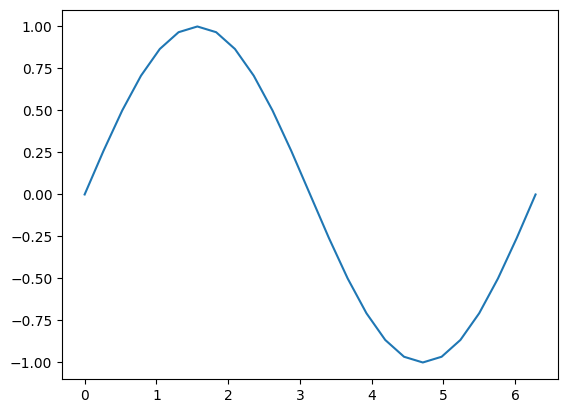

In [60]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

Let's have a closer look at the tensor `b`. When we print it, we see an
indicator that it is tracking its computation history:


In [61]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


This `grad_fn` gives us a hint that when we execute the backpropagation
step and compute gradients, we'll need to compute the derivative of
$\sin(x)$ for all this tensor's inputs.

Let's perform some more computations:


In [62]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let's compute a single-element output. When you call
`.backward()` on a tensor with no arguments, it expects the calling
tensor to contain only a single element, as is the case when computing a
loss function.


In [63]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each `grad_fn` stored with our tensors allows you to walk the
computation all the way back to its inputs with its `next_functions`
property. We can see below that drilling down on this property on `d`
shows us the gradient functions for all the prior tensors. Note that
`a.grad_fn` is reported as `None`, indicating that this was an input to
the function with no history of its own.


In [64]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f0899c22b30>, 0), (None, 0))
((<SinBackward0 object at 0x7f0899b630d0>, 0), (None, 0))
((<AccumulateGrad object at 0x7f08905d4850>, 0),)
()

c:

b:

a:
None


With all this machinery in place, how do we get derivatives out? You
call the `backward()` method on the output, and check the input's `grad`
property to inspect the gradients:


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


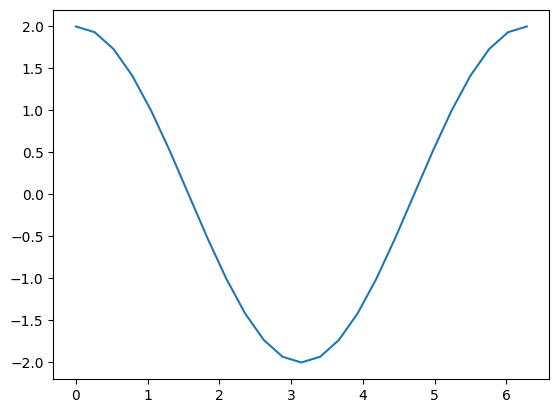

In [65]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Recall the computation steps we took to get here:

``` {.python}
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()
```

Adding a constant, as we did to compute `d`, does not change the
derivative. That leaves $c = 2 * b = 2 * \sin(a)$, the derivative of
which should be $2 * \cos(a)$. Looking at the graph above, that's just
what we see.

Be aware that only *leaf nodes* of the computation have their gradients
computed. If you tried, for example, `print(c.grad)` you'd get back
`None`. In this simple example, only the input is a leaf node, so only
it has gradients computed.

Autograd in Training
====================

We've had a brief look at how autograd works, but how does it look when
it's used for its intended purpose? Let's define a small model and
examine how it changes after a single training batch. First, define a
few constants, our model, and some stand-ins for inputs and outputs:


In [66]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

One thing you might notice is that we never specify `requires_grad=True`
for the model's layers. Within a subclass of `torch.nn.Module`, it's
assumed that we want to track gradients on the layers' weights for
learning.

If we look at the layers of the model, we can examine the values of the
weights, and verify that no gradients have been computed yet:


In [67]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0578,  0.0164, -0.0324,  0.0208,  0.0642, -0.0139,  0.0779,  0.0258,
        -0.0904, -0.0791], grad_fn=<SliceBackward0>)
None


Let's see how this changes when we run through one training batch. For a
loss function, we'll just use the square of the Euclidean distance
between our `prediction` and the `ideal_output`, and we'll use a basic
stochastic gradient descent optimizer.


In [68]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(196.7258, grad_fn=<SumBackward0>)


Now, let's call `loss.backward()` and see what happens:


In [69]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0578,  0.0164, -0.0324,  0.0208,  0.0642, -0.0139,  0.0779,  0.0258,
        -0.0904, -0.0791], grad_fn=<SliceBackward0>)
tensor([6.3177, 8.6403, 6.8705, 0.2129, 1.1862, 4.9568, 3.0792, 7.8493, 1.8272,
        8.8125])


We can see that the gradients have been computed for each learning
weight, but the weights remain unchanged, because we haven't run the
optimizer yet. The optimizer is responsible for updating model weights
based on the computed gradients.


In [70]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0894, -0.0268, -0.0667,  0.0197,  0.0583, -0.0387,  0.0625, -0.0134,
        -0.0995, -0.1232], grad_fn=<SliceBackward0>)
tensor([6.3177, 8.6403, 6.8705, 0.2129, 1.1862, 4.9568, 3.0792, 7.8493, 1.8272,
        8.8125])


You should see that `layer2`'s weights have changed.

One important thing about the process: After calling `optimizer.step()`,
you need to call `optimizer.zero_grad()`, or else every time you run
`loss.backward()`, the gradients on the learning weights will
accumulate:


In [ ]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

After running the cell above, you should see that after running
`loss.backward()` multiple times, the magnitudes of most of the
gradients will be much larger. Failing to zero the gradients before
running your next training batch will cause the gradients to blow up in
this manner, causing incorrect and unpredictable learning results.

Turning Autograd Off and On
===========================

There are situations where you will need fine-grained control over
whether autograd is enabled. There are multiple ways to do this,
depending on the situation.

The simplest is to change the `requires_grad` flag on a tensor directly:


In [72]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In the cell above, we see that `b1` has a `grad_fn` (i.e., a traced
computation history), which is what we expect, since it was derived from
a tensor, `a`, that had autograd turned on. When we turn off autograd
explicitly with `a.requires_grad = False`, computation history is no
longer tracked, as we see when we compute `b2`.

If you only need autograd turned off temporarily, a better way is to use
the `torch.no_grad()`:


In [73]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


`torch.no_grad()` can also be used as a function or method decorator:


In [74]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


There's a corresponding context manager, `torch.enable_grad()`, for
turning autograd on when it isn't already. It may also be used as a
decorator.

Finally, you may have a tensor that requires gradient tracking, but you
want a copy that does not. For this we have the `Tensor` object's
`detach()` method - it creates a copy of the tensor that is *detached*
from the computation history:


In [75]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.1783, 0.2207, 0.4478, 0.2368, 0.8141], requires_grad=True)
tensor([0.1783, 0.2207, 0.4478, 0.2368, 0.8141])


We did this above when we wanted to graph some of our tensors. This is
because `matplotlib` expects a NumPy array as input, and the implicit
conversion from a PyTorch tensor to a NumPy array is not enabled for
tensors with requires\_grad=True. Making a detached copy lets us move
forward.

Autograd and In-place Operations
================================

In every example in this notebook so far, we've used variables to
capture the intermediate values of a computation. Autograd needs these
intermediate values to perform gradient computations. *For this reason,
you must be careful about using in-place operations when using
autograd.* Doing so can destroy information you need to compute
derivatives in the `backward()` call. PyTorch will even stop you if you
attempt an in-place operation on leaf variable that requires autograd,
as shown below.

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>NOTE:</strong></div>

<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p>The following code cell throws a runtime error. This is expected.<pre><code>a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)</code></pre></p>

</div>



Autograd Profiler
=================

Autograd tracks every step of your computation in detail. Such a
computation history, combined with timing information, would make a
handy profiler - and autograd has that feature baked in. Here's a quick
example usage:


In [76]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

<ipython-input-76-cb25284932df>:11: FutureWarning: The attribute `use_cuda` will be deprecated soon, please use ``use_device = 'cuda'`` instead.
  with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:


-------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                     Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
          cudaEventRecord        39.60%       5.848ms        39.60%       5.848ms       1.462us       0.000us         0.00%       0.000us       0.000us          4000  
                aten::mul        30.62%       4.521ms        30.62%       4.521ms       4.521us       7.845ms        50.93%       7.845ms       7.845us          1000  
                aten::div        29.69%       4.385ms        29.69%       4.385ms       4.385us       7.558ms        49.07%       7.558ms       7.558us        

The profiler can also label individual sub-blocks of code, break out the
data by input tensor shape, and export data as a Chrome tracing tools
file. For full details of the API, see the
[documentation](https://pytorch.org/docs/stable/autograd.html#profiler).

Advanced Topic: More Autograd Detail and the High-Level API
===========================================================

If you have a function with an n-dimensional input and m-dimensional
output, $\vec{y}=f(\vec{x})$, the complete gradient is a matrix of the
derivative of every output with respect to every input, called the
*Jacobian:*

$$\begin{aligned}
J
=
\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)
\end{aligned}$$

If you have a second function, $l=g\left(\vec{y}\right)$ that takes
m-dimensional input (that is, the same dimensionality as the output
above), and returns a scalar output, you can express its gradients with
respect to $\vec{y}$ as a column vector,
$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$
- which is really just a one-column Jacobian.

More concretely, imagine the first function as your PyTorch model (with
potentially many inputs and many outputs) and the second function as a
loss function (with the model's output as input, and the loss value as
the scalar output).

If we multiply the first function's Jacobian by the gradient of the
second function, and apply the chain rule, we get:

$$\begin{aligned}
J^{T}\cdot v=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
\vdots & \ddots & \vdots\\
\frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\left(\begin{array}{c}
\frac{\partial l}{\partial y_{1}}\\
\vdots\\
\frac{\partial l}{\partial y_{m}}
\end{array}\right)=\left(\begin{array}{c}
\frac{\partial l}{\partial x_{1}}\\
\vdots\\
\frac{\partial l}{\partial x_{n}}
\end{array}\right)
\end{aligned}$$

Note: You could also use the equivalent operation $v^{T}\cdot J$, and
get back a row vector.

The resulting column vector is the *gradient of the second function with
respect to the inputs of the first* - or in the case of our model and
loss function, the gradient of the loss with respect to the model
inputs.

**\`\`torch.autograd\`\` is an engine for computing these products.**
This is how we accumulate the gradients over the learning weights during
the backward pass.

For this reason, the `backward()` call can *also* take an optional
vector input. This vector represents a set of gradients over the tensor,
which are multiplied by the Jacobian of the autograd-traced tensor that
precedes it. Let's try a specific example with a small vector:


In [77]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1465.6471,  361.6230,  506.8873], grad_fn=<MulBackward0>)


If we tried to call `y.backward()` now, we'd get a runtime error and a
message that gradients can only be *implicitly* computed for scalar
outputs. For a multi-dimensional output, autograd expects us to provide
gradients for those three outputs that it can multiply into the
Jacobian:


In [78]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


(Note that the output gradients are all related to powers of two - which
we'd expect from a repeated doubling operation.)

The High-Level API
==================

There is an API on autograd that gives you direct access to important
differential matrix and vector operations. In particular, it allows you
to calculate the Jacobian and the *Hessian* matrices of a particular
function for particular inputs. (The Hessian is like the Jacobian, but
expresses all partial *second* derivatives.) It also provides methods
for taking vector products with these matrices.

Let's take the Jacobian of a simple function, evaluated for a 2
single-element inputs:


In [79]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3736]), tensor([0.9641]))


(tensor([[2.9060]]), tensor([[3.]]))

If you look closely, the first output should equal $2e^x$ (since the
derivative of $e^x$ is $e^x$), and the second value should be 3.

You can, of course, do this with higher-order tensors:


In [80]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.3364, 0.4112, 0.4752]), tensor([0.4107, 0.8640, 0.6348]))


(tensor([[2.7997, 0.0000, 0.0000],
         [0.0000, 3.0174, 0.0000],
         [0.0000, 0.0000, 3.2168]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

The `torch.autograd.functional.hessian()` method works identically
(assuming your function is twice differentiable), but returns a matrix
of all second derivatives.

There is also a function to directly compute the vector-Jacobian
product, if you provide the vector:


In [81]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 509.9130, -536.9694,  703.9870]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))

The `torch.autograd.functional.jvp()` method performs the same matrix
multiplication as `vjp()` with the operands reversed. The `vhp()` and
`hvp()` methods do the same for a vector-Hessian product.

For more information, including performance notes on the [docs for the
functional
API](https://pytorch.org/docs/stable/autograd.html#functional-higher-level-api)


In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Introduction](introyt1_tutorial.html) \|\|
[Tensors](tensors_deeper_tutorial.html) \|\|
[Autograd](autogradyt_tutorial.html) \|\| **Building Models** \|\|
[TensorBoard Support](tensorboardyt_tutorial.html) \|\| [Training
Models](trainingyt.html) \|\| [Model Understanding](captumyt.html)

Building Models with PyTorch
============================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=OSqIP-mOWOI).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/OSqIP-mOWOI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

`torch.nn.Module` and `torch.nn.Parameter`
------------------------------------------

In this video, we'll be discussing some of the tools PyTorch makes
available for building deep learning networks.

Except for `Parameter`, the classes we discuss in this video are all
subclasses of `torch.nn.Module`. This is the PyTorch base class meant to
encapsulate behaviors specific to PyTorch Models and their components.

One important behavior of `torch.nn.Module` is registering parameters.
If a particular `Module` subclass has learning weights, these weights
are expressed as instances of `torch.nn.Parameter`. The `Parameter`
class is a subclass of `torch.Tensor`, with the special behavior that
when they are assigned as attributes of a `Module`, they are added to
the list of that modules parameters. These parameters may be accessed
through the `parameters()` method on the `Module` class.

As a simple example, here's a very simple model with two linear layers
and an activation function. We'll create an instance of it and ask it to
report on its parameters:


In [82]:
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
Parameter containing:
tensor([[-0.0660,  0.0478, -0.0288,  ...,  0.0162,  0.0195,  0.0897],
        [ 0.0243, -0.0374, -0.0433,  ...,  0.0417,  0.0148, -0.0725],
        [-0.0959, -0.0544, -0.0092,  ..., -0.0745,  0.0534,  0.0166],
        ...,
        [ 0.0981,  0.0826, -0.0586,  ...,  0.0799,  0.0394, -0.0395],
        [-0.0136, -0.0432, -0.0400,  ...,  0.0031,  0.0923, -0.0946],
        [-0.0271, -0.0012, -0.0947,  ...,  0.0419,  0.0254,  0.0930]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0508,  0.0166, -0.0871, -0.0174,  0.0944,  0.0273,  0.0831, -0.0961,
         0.0085, -0.0208, -0.0344, -0.0505,  0.0488, -0.0067, -0.0428,  0.0489,
         0.0444,  0.0900,  0.0620,  0.05

This shows the fundamental structure of a PyTorch model: there is an
`__init__()` method that defines the layers and other components of a
model, and a `forward()` method where the computation gets done. Note
that we can print the model, or any of its submodules, to learn about
its structure.

Common Layer Types
==================

Linear Layers
-------------

The most basic type of neural network layer is a *linear* or *fully
connected* layer. This is a layer where every input influences every
output of the layer to a degree specified by the layer's weights. If a
model has *m* inputs and *n* outputs, the weights will be an *m* x *n*
matrix. For example:


In [83]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.1372, 0.2218, 0.3781]])


Weight and Bias parameters:
Parameter containing:
tensor([[-0.5340, -0.3371, -0.2644],
        [ 0.4428,  0.1569, -0.0083]], requires_grad=True)
Parameter containing:
tensor([-0.3139,  0.3567], requires_grad=True)


Output:
tensor([[-0.5619,  0.4491]], grad_fn=<AddmmBackward0>)


If you do the matrix multiplication of `x` by the linear layer's
weights, and add the biases, you'll find that you get the output vector
`y`.

One other important feature to note: When we checked the weights of our
layer with `lin.weight`, it reported itself as a `Parameter` (which is a
subclass of `Tensor`), and let us know that it's tracking gradients with
autograd. This is a default behavior for `Parameter` that differs from
`Tensor`.

Linear layers are used widely in deep learning models. One of the most
common places you'll see them is in classifier models, which will
usually have one or more linear layers at the end, where the last layer
will have *n* outputs, where *n* is the number of classes the classifier
addresses.

Convolutional Layers
====================

*Convolutional* layers are built to handle data with a high degree of
spatial correlation. They are very commonly used in computer vision,
where they detect close groupings of features which the compose into
higher-level features. They pop up in other contexts too - for example,
in NLP applications, where a word's immediate context (that is, the
other words nearby in the sequence) can affect the meaning of a
sentence.

We saw convolutional layers in action in LeNet5 in an earlier video:


In [84]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Let's break down what's happening in the convolutional layers of this
model. Starting with `conv1`:

-   LeNet5 is meant to take in a 1x32x32 black & white image. **The
    first argument to a convolutional layer's constructor is the number
    of input channels.** Here, it is 1. If we were building this model
    to look at 3-color channels, it would be 3.
-   A convolutional layer is like a window that scans over the image,
    looking for a pattern it recognizes. These patterns are called
    *features,* and one of the parameters of a convolutional layer is
    the number of features we would like it to learn. **This is the
    second argument to the constructor is the number of output
    features.** Here, we're asking our layer to learn 6 features.
-   Just above, I likened the convolutional layer to a window - but how
    big is the window? **The third argument is the window or kernel
    size.** Here, the "5" means we've chosen a 5x5 kernel. (If you want
    a kernel with height different from width, you can specify a tuple
    for this argument - e.g., `(3, 5)` to get a 3x5 convolution kernel.)

The output of a convolutional layer is an *activation map* - a spatial
representation of the presence of features in the input tensor. `conv1`
will give us an output tensor of 6x28x28; 6 is the number of features,
and 28 is the height and width of our map. (The 28 comes from the fact
that when scanning a 5-pixel window over a 32-pixel row, there are only
28 valid positions.)

We then pass the output of the convolution through a ReLU activation
function (more on activation functions later), then through a max
pooling layer. The max pooling layer takes features near each other in
the activation map and groups them together. It does this by reducing
the tensor, merging every 2x2 group of cells in the output into a single
cell, and assigning that cell the maximum value of the 4 cells that went
into it. This gives us a lower-resolution version of the activation map,
with dimensions 6x14x14.

Our next convolutional layer, `conv2`, expects 6 input channels
(corresponding to the 6 features sought by the first layer), has 16
output channels, and a 3x3 kernel. It puts out a 16x12x12 activation
map, which is again reduced by a max pooling layer to 16x6x6. Prior to
passing this output to the linear layers, it is reshaped to a 16 \* 6 \*
6 = 576-element vector for consumption by the next layer.

There are convolutional layers for addressing 1D, 2D, and 3D tensors.
There are also many more optional arguments for a conv layer
constructor, including stride length(e.g., only scanning every second or
every third position) in the input, padding (so you can scan out to the
edges of the input), and more. See the
[documentation](https://pytorch.org/docs/stable/nn.html#convolution-layers)
for more information.

Recurrent Layers
================

*Recurrent neural networks* (or *RNNs)* are used for sequential data
-anything from time-series measurements from a scientific instrument to
natural language sentences to DNA nucleotides. An RNN does this by
maintaining a *hidden state* that acts as a sort of memory for what it
has seen in the sequence so far.

The internal structure of an RNN layer - or its variants, the LSTM (long
short-term memory) and GRU (gated recurrent unit) - is moderately
complex and beyond the scope of this video, but we'll show you what one
looks like in action with an LSTM-based part-of-speech tagger (a type of
classifier that tells you if a word is a noun, verb, etc.):


In [85]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

The constructor has four arguments:

-   `vocab_size` is the number of words in the input vocabulary. Each
    word is a one-hot vector (or unit vector) in a
    `vocab_size`-dimensional space.
-   `tagset_size` is the number of tags in the output set.
-   `embedding_dim` is the size of the *embedding* space for the
    vocabulary. An embedding maps a vocabulary onto a low-dimensional
    space, where words with similar meanings are close together in the
    space.
-   `hidden_dim` is the size of the LSTM's memory.

The input will be a sentence with the words represented as indices of
one-hot vectors. The embedding layer will then map these down to an
`embedding_dim`-dimensional space. The LSTM takes this sequence of
embeddings and iterates over it, fielding an output vector of length
`hidden_dim`. The final linear layer acts as a classifier; applying
`log_softmax()` to the output of the final layer converts the output
into a normalized set of estimated probabilities that a given word maps
to a given tag.

If you'd like to see this network in action, check out the [Sequence
Models and LSTM
Networks](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)
tutorial on pytorch.org.

Transformers
============

*Transformers* are multi-purpose networks that have taken over the state
of the art in NLP with models like BERT. A discussion of transformer
architecture is beyond the scope of this video, but PyTorch has a
`Transformer` class that allows you to define the overall parameters of
a transformer model - the number of attention heads, the number of
encoder & decoder layers, dropout and activation functions, etc. (You
can even build the BERT model from this single class, with the right
parameters!) The `torch.nn.Transformer` class also has classes to
encapsulate the individual components (`TransformerEncoder`,
`TransformerDecoder`) and subcomponents (`TransformerEncoderLayer`,
`TransformerDecoderLayer`). For details, check out the
[documentation](https://pytorch.org/docs/stable/nn.html#transformer-layers)
on transformer classes.

Other Layers and Functions
--------------------------

Data Manipulation Layers
========================

There are other layer types that perform important functions in models,
but don't participate in the learning process themselves.

**Max pooling** (and its twin, min pooling) reduce a tensor by combining
cells, and assigning the maximum value of the input cells to the output
cell (we saw this). For example:


In [86]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.8724, 0.0521, 0.5234, 0.2712, 0.8075, 0.6849],
         [0.6205, 0.8893, 0.3989, 0.0695, 0.6793, 0.9779],
         [0.7896, 0.1310, 0.6721, 0.1847, 0.5465, 0.4129],
         [0.7210, 0.7140, 0.5548, 0.6181, 0.5909, 0.7307],
         [0.3257, 0.0643, 0.4201, 0.7515, 0.9315, 0.5707],
         [0.2225, 0.0919, 0.5892, 0.4374, 0.4969, 0.8219]]])
tensor([[[0.8893, 0.9779],
         [0.7210, 0.9315]]])


If you look closely at the values above, you'll see that each of the
values in the maxpooled output is the maximum value of each quadrant of
the 6x6 input.

**Normalization layers** re-center and normalize the output of one layer
before feeding it to another. Centering and scaling the intermediate
tensors has a number of beneficial effects, such as letting you use
higher learning rates without exploding/vanishing gradients.


In [87]:
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[14.0815,  7.7938, 18.1404, 13.3007],
         [19.6295, 17.2427, 16.1859, 13.0774],
         [15.5525, 11.4228, 12.4842, 23.5243],
         [16.1281, 18.5413,  6.0246, 10.3449]]])
tensor(14.5922)
tensor([[[ 0.2041, -1.5016,  1.3052, -0.0077],
         [ 1.3154,  0.3012, -0.1479, -1.4687],
         [-0.0408, -0.9121, -0.6881,  1.6410],
         [ 0.6877,  1.1804, -1.3750, -0.4930]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(7.4506e-09, grad_fn=<MeanBackward0>)


Running the cell above, we've added a large scaling factor and offset to
an input tensor; you should see the input tensor's `mean()` somewhere in
the neighborhood of 15. After running it through the normalization
layer, you can see that the values are smaller, and grouped around zero
- in fact, the mean should be very small (\> 1e-8).

This is beneficial because many activation functions (discussed below)
have their strongest gradients near 0, but sometimes suffer from
vanishing or exploding gradients for inputs that drive them far away
from zero. Keeping the data centered around the area of steepest
gradient will tend to mean faster, better learning and higher feasible
learning rates.

**Dropout layers** are a tool for encouraging *sparse representations*
in your model - that is, pushing it to do inference with less data.

Dropout layers work by randomly setting parts of the input tensor
*during training* - dropout layers are always turned off for inference.
This forces the model to learn against this masked or reduced dataset.
For example:


In [88]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.4737, 0.0000, 1.6428, 0.0000],
         [0.0000, 1.1499, 0.6046, 0.8485],
         [0.0000, 0.0000, 1.2764, 0.0000],
         [0.0000, 0.9891, 0.6166, 0.5261]]])
tensor([[[0.4737, 0.0000, 0.0000, 0.1840],
         [0.0000, 1.1499, 0.6046, 0.0000],
         [1.5198, 0.0000, 0.0000, 1.2674],
         [0.2531, 0.0000, 0.0000, 0.5261]]])


Above, you can see the effect of dropout on a sample tensor. You can use
the optional `p` argument to set the probability of an individual weight
dropping out; if you don't it defaults to 0.5.

Activation Functions
====================

Activation functions make deep learning possible. A neural network is
really a program - with many parameters - that *simulates a mathematical
function*. If all we did was multiple tensors by layer weights
repeatedly, we could only simulate *linear functions;* further, there
would be no point to having many layers, as the whole network would
reduce could be reduced to a single matrix multiplication. Inserting
*non-linear* activation functions between layers is what allows a deep
learning model to simulate any function, rather than just linear ones.

`torch.nn.Module` has objects encapsulating all of the major activation
functions including ReLU and its many variants, Tanh, Hardtanh, sigmoid,
and more. It also includes other functions, such as Softmax, that are
most useful at the output stage of a model.

Loss Functions
==============

Loss functions tell us how far a model's prediction is from the correct
answer. PyTorch contains a variety of loss functions, including common
MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative
Likelihood Loss (useful for classifiers), and others.


In [89]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Introduction](introyt1_tutorial.html) \|\|
[Tensors](tensors_deeper_tutorial.html) \|\|
[Autograd](autogradyt_tutorial.html) \|\| [Building
Models](modelsyt_tutorial.html) \|\| **TensorBoard Support** \|\|
[Training Models](trainingyt.html) \|\| [Model
Understanding](captumyt.html)

PyTorch TensorBoard Support
===========================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=6CEld3hZgqc).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/6CEld3hZgqc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

Before You Start
----------------

To run this tutorial, you'll need to install PyTorch, TorchVision,
Matplotlib, and TensorBoard.

With `conda`:

``` {.sh}
conda install pytorch torchvision -c pytorch
conda install matplotlib tensorboard
```

With `pip`:

``` {.sh}
pip install torch torchvision matplotlib tensorboard
```

Once the dependencies are installed, restart this notebook in the Python
environment where you installed them.

Introduction
------------

In this notebook, we'll be training a variant of LeNet-5 against the
Fashion-MNIST dataset. Fashion-MNIST is a set of image tiles depicting
various garments, with ten class labels indicating the type of garment
depicted.


In [ ]:
# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter

# In case you are using an environment that has TensorFlow installed,
# such as Google Colab, uncomment the following code to avoid
# a bug with saving embeddings to your TensorBoard directory

# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

Showing Images in TensorBoard
=============================

Let's start by adding sample images from our dataset to TensorBoard:


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.9MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



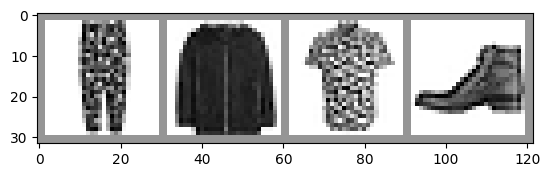

In [91]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

Above, we used TorchVision and Matplotlib to create a visual grid of a
minibatch of our input data. Below, we use the `add_image()` call on
`SummaryWriter` to log the image for consumption by TensorBoard, and we
also call `flush()` to make sure it's written to disk right away.


In [92]:
# Default log_dir argument is "runs" - but it's good to be specific
# torch.utils.tensorboard.SummaryWriter is imported above
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#   tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

If you start TensorBoard at the command line and open it in a new
browser tab (usually at [localhost:6006](localhost:6006)), you should
see the image grid under the IMAGES tab.

Graphing Scalars to Visualize Training
======================================

TensorBoard is useful for tracking the progress and efficacy of your
training. Below, we'll run a training loop, track some metrics, and save
the data for TensorBoard's consumption.

Let's define a model to categorize our image tiles, and an optimizer and
loss function for training:


In [95]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

Now let's train a single epoch, and evaluate the training vs. validation
set losses every 1000 batches:


In [96]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            net.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Switching back to training mode, eg. turning on regularisation

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


Switch to your open TensorBoard and have a look at the SCALARS tab.

Visualizing Your Model
======================

TensorBoard can also be used to examine the data flow within your model.
To do this, call the `add_graph()` method with a model and sample input:


In [97]:
# Again, grab a single mini-batch of images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(net, images)
writer.flush()

When you switch over to TensorBoard, you should see a GRAPHS tab.
Double-click the "NET" node to see the layers and data flow within your
model.

Visualizing Your Dataset with Embeddings
========================================

The 28-by-28 image tiles we're using can be modeled as 784-dimensional
vectors (28 \* 28 = 784). It can be instructive to project this to a
lower-dimensional representation. The `add_embedding()` method will
project a set of data onto the three dimensions with highest variance,
and display them as an interactive 3D chart. The `add_embedding()`
method does this automatically by projecting to the three dimensions
with highest variance.

Below, we'll take a sample of our data, and generate such an embedding:


In [98]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

Now if you switch to TensorBoard and select the PROJECTOR tab, you
should see a 3D representation of the projection. You can rotate and
zoom the model. Examine it at large and small scales, and see whether
you can spot patterns in the projected data and the clustering of
labels.

For better visibility, it's recommended to:

-   Select "label" from the "Color by" drop-down on the left.
-   Toggle the Night Mode icon along the top to place the light-colored
    images on a dark background.

Other Resources
===============

For more information, have a look at:

-   PyTorch documentation on
    [torch.utils.tensorboard.SummaryWriter](https://pytorch.org/docs/stable/tensorboard.html?highlight=summarywriter)
-   Tensorboard tutorial content in the [PyTorch.org
    Tutorials](https://pytorch.org/tutorials/)
-   For more information about TensorBoard, see the [TensorBoard
    documentation](https://www.tensorflow.org/tensorboard)


In [99]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

[Introduction](introyt1_tutorial.html) \|\|
[Tensors](tensors_deeper_tutorial.html) \|\|
[Autograd](autogradyt_tutorial.html) \|\| [Building
Models](modelsyt_tutorial.html) \|\| [TensorBoard
Support](tensorboardyt_tutorial.html) \|\| **Training Models** \|\|
[Model Understanding](captumyt.html)

Training with PyTorch
=====================

Follow along with the video below or on
[youtube](https://www.youtube.com/watch?v=jF43_wj_DCQ).

``` {.python .jupyter-code-cell}
from IPython.display import display, HTML
html_code = """
<div style="margin-top:10px; margin-bottom:10px;">
  <iframe width="560" height="315" src="https://www.youtube.com/embed/jF43_wj_DCQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>
"""
display(HTML(html_code))
```

Introduction
------------

In past videos, we've discussed and demonstrated:

-   Building models with the neural network layers and functions of the
    torch.nn module
-   The mechanics of automated gradient computation, which is central to
    gradient-based model training
-   Using TensorBoard to visualize training progress and other
    activities

In this video, we'll be adding some new tools to your inventory:

-   We'll get familiar with the dataset and dataloader abstractions, and
    how they ease the process of feeding data to your model during a
    training loop
-   We'll discuss specific loss functions and when to use them
-   We'll look at PyTorch optimizers, which implement algorithms to
    adjust model weights based on the outcome of a loss function

Finally, we'll pull all of these together and see a full PyTorch
training loop in action.

Dataset and DataLoader
----------------------

The `Dataset` and `DataLoader` classes encapsulate the process of
pulling your data from storage and exposing it to your training loop in
batches.

The `Dataset` is responsible for accessing and processing single
instances of data.

The `DataLoader` pulls instances of data from the `Dataset` (either
automatically or with a sampler that you define), collects them in
batches, and returns them for consumption by your training loop. The
`DataLoader` works with all kinds of datasets, regardless of the type of
data they contain.

For this tutorial, we'll be using the Fashion-MNIST dataset provided by
TorchVision. We use `torchvision.transforms.Normalize()` to zero-center
and normalize the distribution of the image tile content, and download
both training and validation data splits.


In [100]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


As always, let's visualize the data as a sanity check:


Bag  Coat  Pullover  Bag


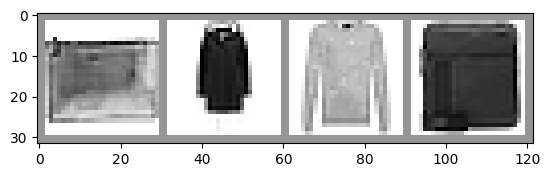

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

The Model
=========

The model we'll use in this example is a variant of LeNet-5 - it should
be familiar if you've watched the previous videos in this series.


In [102]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

Loss Function
=============

For this example, we'll be using a cross-entropy loss. For demonstration
purposes, we'll create batches of dummy output and label values, run
them through the loss function, and examine the result.


In [103]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.4753, 0.6406, 0.3770, 0.2260, 0.3039, 0.7103, 0.3736, 0.6462, 0.6525,
         0.1568],
        [0.8526, 0.0800, 0.8026, 0.8590, 0.1236, 0.7815, 0.5574, 0.2931, 0.8521,
         0.0931],
        [0.2438, 0.6945, 0.0434, 0.3200, 0.6681, 0.7111, 0.3049, 0.3037, 0.3907,
         0.7617],
        [0.1717, 0.2951, 0.8188, 0.1211, 0.2832, 0.9372, 0.6476, 0.1979, 0.7552,
         0.5081]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.3274948596954346


Optimizer
=========

For this example, we'll be using simple [stochastic gradient
descent](https://pytorch.org/docs/stable/optim.html) with momentum.

It can be instructive to try some variations on this optimization
scheme:

-   Learning rate determines the size of the steps the optimizer takes.
    What does a different learning rate do to the your training results,
    in terms of accuracy and convergence time?
-   Momentum nudges the optimizer in the direction of strongest gradient
    over multiple steps. What does changing this value do to your
    results?
-   Try some different optimization algorithms, such as averaged SGD,
    Adagrad, or Adam. How do your results differ?


In [104]:
# Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

The Training Loop
=================

Below, we have a function that performs one training epoch. It
enumerates data from the DataLoader, and on each pass of the loop does
the following:

-   Gets a batch of training data from the DataLoader
-   Zeros the optimizer's gradients
-   Performs an inference - that is, gets predictions from the model for
    an input batch
-   Calculates the loss for that set of predictions vs. the labels on
    the dataset
-   Calculates the backward gradients over the learning weights
-   Tells the optimizer to perform one learning step - that is, adjust
    the model's learning weights based on the observed gradients for
    this batch, according to the optimization algorithm we chose
-   It reports on the loss for every 1000 batches.
-   Finally, it reports the average per-batch loss for the last 1000
    batches, for comparison with a validation run


In [105]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

Per-Epoch Activity
==================

There are a couple of things we'll want to do once per epoch:

-   Perform validation by checking our relative loss on a set of data
    that was not used for training, and report this
-   Save a copy of the model

Here, we'll do our reporting in TensorBoard. This will require going to
the command line to start TensorBoard, and opening it in another browser
tab.


In [106]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 10

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 1.2407228263523429
  batch 2000 loss: 0.7447262428709073
  batch 3000 loss: 0.620096411830149
  batch 4000 loss: 0.5647598720234164
  batch 5000 loss: 0.5412475800080574
  batch 6000 loss: 0.5231343562626221
  batch 7000 loss: 0.4947164810871618
  batch 8000 loss: 0.48562994779022844
  batch 9000 loss: 0.4967561713561299
  batch 10000 loss: 0.46601515697391005
  batch 11000 loss: 0.5022053881804895
  batch 12000 loss: 0.4480734685155949
  batch 13000 loss: 0.4394713856492917
  batch 14000 loss: 0.41659240305376444
  batch 15000 loss: 0.4477725848404516
LOSS train 0.4477725848404516 valid 0.44510766863822937
EPOCH 2:
  batch 1000 loss: 0.43757492329342856
  batch 2000 loss: 0.43847297872603214
  batch 3000 loss: 0.4205772340402673
  batch 4000 loss: 0.4392407243750672
  batch 5000 loss: 0.4428412042823093
  batch 6000 loss: 0.43055014562011024
  batch 7000 loss: 0.421192861450746
  batch 8000 loss: 0.43543081308624915
  batch 9000 loss: 0.4359343656747485
  b

To load a saved version of the model:

``` {.python}
saved_model = GarmentClassifier()
saved_model.load_state_dict(torch.load(PATH))
```

Once you've loaded the model, it's ready for whatever you need it for
-more training, inference, or analysis.

Note that if your model has constructor parameters that affect model
structure, you'll need to provide them and configure the model
identically to the state in which it was saved.

Other Resources
===============

-   Docs on the [data
    utilities](https://pytorch.org/docs/stable/data.html), including
    Dataset and DataLoader, at pytorch.org
-   A [note on the use of pinned
    memory](https://pytorch.org/docs/stable/notes/cuda.html#cuda-memory-pinning)
    for GPU training
-   Documentation on the datasets available in
    [TorchVision](https://pytorch.org/vision/stable/datasets.html),
    [TorchText](https://pytorch.org/text/stable/datasets.html), and
    [TorchAudio](https://pytorch.org/audio/stable/datasets.html)
-   Documentation on the [loss
    functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
    available in PyTorch
-   Documentation on the [torch.optim
    package](https://pytorch.org/docs/stable/optim.html), which includes
    optimizers and related tools, such as learning rate scheduling
-   A detailed [tutorial on saving and loading
    models](https://pytorch.org/tutorials/beginner/saving_loading_models.html)
-   The [Tutorials section of
    pytorch.org](https://pytorch.org/tutorials/) contains tutorials on a
    broad variety of training tasks, including classification in
    different domains, generative adversarial networks, reinforcement
    learning, and more
